### Import Library

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import csv
import requests
from io import StringIO

!pip install emoji
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.1 MB/s eta 0:00:00


### Loading Dataset

In [2]:
app_reviews_df = pd.read_csv('review_wuwa.csv')

In [3]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4e021c1c-46c2-42d7-91d1-6f5dd67dd2da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,(1)Design NPC & ekspresinya wajahnya bagus bgt...,5,16,2.1.0,2025-03-26 19:58:26,NaN,NaN,2.1.0
1,f892df27-52af-42a8-b15b-e3514267b49c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gamenya udah bagus dari segi grafiknya aku suk...,5,216,2.1.0,2025-03-23 11:57:27,NaN,NaN,2.1.0
2,7a1fe121-e70b-4750-a969-282dd372ff19,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"ini game dari segi story mantap, eksplorasi se...",5,7,2.2.0,2025-04-06 12:30:20,NaN,NaN,2.2.0
3,efdd3060-517d-4a12-b4d0-517fb2e9df3f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"game yang sangat bagus dari segi story,musik,g...",5,79,2.1.0,2025-03-25 03:34:07,NaN,NaN,2.1.0
4,1ae1075e-915f-4ad1-aa6f-0dc090c0799f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"good gameee, aku suka cara explore nya juga en...",5,0,2.2.0,2025-04-08 21:51:42,NaN,NaN,2.2.0


In [4]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22457 entries, 0 to 22456
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              22457 non-null  object
 1   userName              22457 non-null  object
 2   userImage             22457 non-null  object
 3   content               22457 non-null  object
 4   score                 22457 non-null  int64 
 5   thumbsUpCount         22457 non-null  int64 
 6   reviewCreatedVersion  16954 non-null  object
 7   at                    22457 non-null  object
 8   replyContent          2 non-null      object
 9   repliedAt             2 non-null      object
 10  appVersion            16954 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.9+ MB


In [5]:
clean_df = app_reviews_df.drop(columns=['replyContent', 'repliedAt'])

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22457 entries, 0 to 22456
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              22457 non-null  object
 1   userName              22457 non-null  object
 2   userImage             22457 non-null  object
 3   content               22457 non-null  object
 4   score                 22457 non-null  int64 
 5   thumbsUpCount         22457 non-null  int64 
 6   reviewCreatedVersion  16954 non-null  object
 7   at                    22457 non-null  object
 8   appVersion            16954 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


In [7]:
clean_df = clean_df.dropna()

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16954 entries, 0 to 20275
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16954 non-null  object
 1   userName              16954 non-null  object
 2   userImage             16954 non-null  object
 3   content               16954 non-null  object
 4   score                 16954 non-null  int64 
 5   thumbsUpCount         16954 non-null  int64 
 6   reviewCreatedVersion  16954 non-null  object
 7   at                    16954 non-null  object
 8   appVersion            16954 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.3+ MB


### Preprocessing Text

In [9]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = emoji.replace_emoji(text, replace='') # menghapus emoji

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku','mu','kau','kami','kita','gue','gua','loh','lah','deh', 'dong','pun','kan','mah','aja','nih','tuh','kayak','kayaknya','banget','cuma','doang','juga','mas','mbak','bgt','dgn','dulu','bakal','sampe','sama','udah','lagi','mau','boleh','kalau','kenapa','terus','padahal','seperti','tentu','seharusnya','mungkin','apalagi','tetap','tetapi','meskipun','karena','jadi','biar','agar','tanpa','yang','dalam','dan','atau','tapi','untuk','dari','ke','di','pada','yg','ga','gk','dah'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [10]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_tokenizingText'] = clean_df['text_casefoldingText'].apply(tokenizingText)

clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [11]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_akhir
0,4e021c1c-46c2-42d7-91d1-6f5dd67dd2da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,(1)Design NPC & ekspresinya wajahnya bagus bgt...,5,16,2.1.0,2025-03-26 19:58:26,2.1.0,Design NPC ekspresinya wajahnya bagus bgt apa...,design npc ekspresinya wajahnya bagus bgt apa...,"[design, npc, ekspresinya, wajahnya, bagus, bg...","[design, npc, ekspresinya, wajahnya, bagus, re...",design npc ekspresinya wajahnya bagus resonato...
1,f892df27-52af-42a8-b15b-e3514267b49c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gamenya udah bagus dari segi grafiknya aku suk...,5,216,2.1.0,2025-03-23 11:57:27,2.1.0,gamenya udah bagus dari segi grafiknya aku suk...,gamenya udah bagus dari segi grafiknya aku suk...,"[gamenya, udah, bagus, dari, segi, grafiknya, ...","[gamenya, bagus, segi, grafiknya, suka, bertar...",gamenya bagus segi grafiknya suka bertarung ke...
2,7a1fe121-e70b-4750-a969-282dd372ff19,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"ini game dari segi story mantap, eksplorasi se...",5,7,2.2.0,2025-04-06 12:30:20,2.2.0,ini game dari segi story mantap eksplorasi ser...,ini game dari segi story mantap eksplorasi ser...,"[ini, game, dari, segi, story, mantap, eksplor...","[game, segi, story, mantap, eksplorasi, seru, ...",game segi story mantap eksplorasi seru dangan ...
3,efdd3060-517d-4a12-b4d0-517fb2e9df3f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"game yang sangat bagus dari segi story,musik,g...",5,79,2.1.0,2025-03-25 03:34:07,2.1.0,game yang sangat bagus dari segi storymusikgra...,game yang sangat bagus dari segi storymusikgra...,"[game, yang, sangat, bagus, dari, segi, storym...","[game, bagus, segi, storymusikgrafikdesain, ka...",game bagus segi storymusikgrafikdesain karakte...
4,1ae1075e-915f-4ad1-aa6f-0dc090c0799f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"good gameee, aku suka cara explore nya juga en...",5,0,2.2.0,2025-04-08 21:51:42,2.2.0,good gameee aku suka cara explore nya juga ena...,good gameee aku suka cara explore nya juga ena...,"[good, gameee, aku, suka, cara, explore, nya, ...","[good, gameee, suka, explore, enak, pemandanga...",good gameee suka explore enak pemandangan kere...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20271,67f043f8-a6c6-4f53-a5de-eb6c907dd3ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,❤️❤️❤️,5,0,1.0.0,2024-05-22 06:21:09,1.0.0,,,[],[],
20272,a6f5c7b5-af4d-4e78-b184-880ce36b20ba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,❤️,5,0,1.0.0,2024-05-30 00:50:12,1.0.0,,,[],[],
20273,dedbdbd7-3a6e-4328-8f48-f7fda519527a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,❣️❣️,5,0,1.0.0,2024-05-27 12:35:52,1.0.0,,,[],[],
20274,479f7d2c-fb43-4183-9289-00cf73cf7f26,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲🥲,1,0,1.0.0,2024-05-23 10:48:35,1.0.0,,,[],[],


### Pelabelan

In [12]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [13]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score <= 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    return score, polarity

In [14]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    9186
positive    7768
Name: count, dtype: int64


### Eksplorasi Label

In [15]:
# Menampilkan contoh komentar untuk setiap kategori sentimen
print("\nContoh komentar positif:")
print(clean_df[clean_df['polarity'] == 'positive']['content'].sample(3, random_state=42).to_string(index=False))

print("\nContoh komentar negatif:")
print(clean_df[clean_df['polarity'] == 'negative']['content'].sample(3, random_state=42).to_string(index=False))


Contoh komentar positif:
bagus game nya, tapi mohon fix bug shadow di me...
                          kentang tidak disarankan
Asik sih mekaniknya gebuk" gitu walaupun gua do...

Contoh komentar negatif:
            please no censorship, it's already 16+
game nya udah bagus tapi masih ada yg kurang ko...
Game ya seru semoga next update ada bahasa Indo...


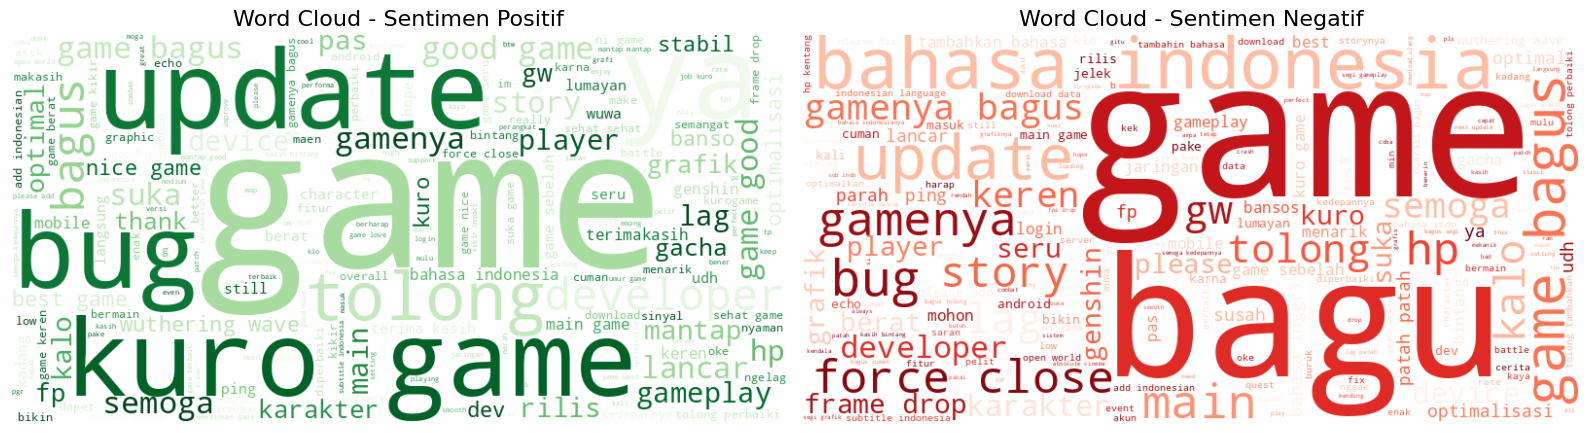

In [16]:
import matplotlib.pyplot as plt

positive_words = clean_df[clean_df['polarity'] == 'positive']['text_akhir'].str.cat(sep=' ')
negative_words = clean_df[clean_df['polarity'] == 'negative']['text_akhir'].str.cat(sep=' ')

wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Positif', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Negatif', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

### Modeling

#### Random Forest TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=5000, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,abis,absolute,account,action,actually,ad,adain,adakan,add,added,...,worth,would,wow,wuthering,wuwa,ww,ya,yah,yinlin,yng
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.201361,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.255573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16949,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16950,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16951,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16952,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Bagi data menjadi data latih dan data uji (80% digunakan untuk training, 20% digunakan untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier()

random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train (TF-IDF):', accuracy_train_rf)
print('Random Forest - accuracy_test (TF-IDF):', accuracy_test_rf)

Random Forest - accuracy_train (TF-IDF): 0.9967558799675588
Random Forest - accuracy_test (TF-IDF): 0.8835151872603951


#### Logistic Regression TF-IDF

In [19]:
from sklearn.linear_model import LogisticRegression

# Bagi data menjadi data latih dan data uji (70% digunakan untuk training, 30% digunakan untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train (TF-IDF):', accuracy_train_lr)
print('Logistic Regression - accuracy_test (TF-IDF):', accuracy_test_lr)

Logistic Regression - accuracy_train (TF-IDF): 0.927193056374821
Logistic Regression - accuracy_test (TF-IDF): 0.9129152742284254


#### Logistic Regression BoW

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()

X_bow = bow_vectorizer.fit_transform(clean_df['text_akhir'])
y = clean_df['polarity']

# Bagi data menjadi data latih dan data uji (80% digunakan untuk training, 20% digunakan untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

model_bow = LogisticRegression(max_iter=3000)
model_bow.fit(X_train, y_train)

y_pred_train = model_bow.predict(X_train)
y_pred_test = model_bow.predict(X_test)

# Evaluasi akurasi model Logistic Regression Bag of Words
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

# Menampilkan akurasi
print(f"Logistic Regression - accuracy_train (BoW):", acc_train)
print(f"Logistic Regression - accuracy_test  (BoW):", acc_test)

Logistic Regression - accuracy_train (BoW): 0.9757428297574283
Logistic Regression - accuracy_test  (BoW): 0.9221468593335299
